<a href="https://colab.research.google.com/github/adeeshajayasinghe/DL-models/blob/main/cnn_transfer_learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

import tf_keras

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [2]:
IMAGE_SHAPE = (224, 224)

classifier = tf_keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

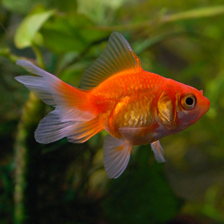

In [3]:
# Check the pre-trained model
gold_fish = Image.open('goldfish.jpg').resize(IMAGE_SHAPE)
gold_fish

In [4]:
gold_fish = np.array(gold_fish) / 255.0
gold_fish.shape

(224, 224, 3)

In [5]:
# Since predictions accept multiple images, resize
gold_fish[np.newaxis, ...].shape

(1, 224, 224, 3)

In [6]:
result = classifier.predict(gold_fish[np.newaxis, ...])
result.shape

1/1 [==============================] - 3s 3s/step


(1, 1001)

In [7]:
predicted_label_index = np.argmax(result)
predicted_label_index

2

In [8]:
image_labels = []
with open("ImageNetLabels.txt", "r") as f:
  image_labels = f.read().splitlines()
image_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [9]:
image_labels[predicted_label_index]

'goldfish'

In [2]:
# Load the local dataset
dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url, cache_dir='.', untar=True)

In [3]:

import pathlib

data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [12]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('datasets/flower_photos/roses/3921794817_276eb4386b.jpg'),
 PosixPath('datasets/flower_photos/roses/16772483324_09f24813a1_n.jpg'),
 PosixPath('datasets/flower_photos/roses/9404876600_04f6d37685.jpg'),
 PosixPath('datasets/flower_photos/roses/5892908233_6756199a43.jpg'),
 PosixPath('datasets/flower_photos/roses/7409458444_0bfc9a0682_n.jpg')]

In [4]:
flowers_images_dict = {
    'roses' : list(data_dir.glob('roses/*')),
    'daisy' : list(data_dir.glob('daisy/*')),
    'dandelion' : list(data_dir.glob('dandelion/*')),
    'sunflowers' : list(data_dir.glob('sunflowers/*')),
    'tulips' : list(data_dir.glob('tulips/*')),
}

In [5]:
flowers_labels_dict = {
    'roses' : 0,
    'daisy' : 1,
    'dandelion' : 2,
    'sunflowers' : 3,
    'tulips' : 4,
}

In [7]:
# create the dataset
IMAGE_SHAPE = (224, 224)
X, y = [], []
for flower_name, images in flowers_images_dict.items():
  for image in images:
    img = cv2.imread(image)
    resized_img = cv2.resize(img, IMAGE_SHAPE)
    X.append(resized_img)
    y.append(flowers_labels_dict[flower_name])

In [8]:
X = np.array(X)
y = np.array(y)
X.shape, y.shape

((3670, 224, 224, 3), (3670,))

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

In [10]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [11]:
# Check the new images with the pre-trained model
predicted = classifier.predict(np.array([X[0], X[1], X[2]]))
predicted = np.argmax(predicted, axis=1)
predicted

NameError: name 'classifier' is not defined

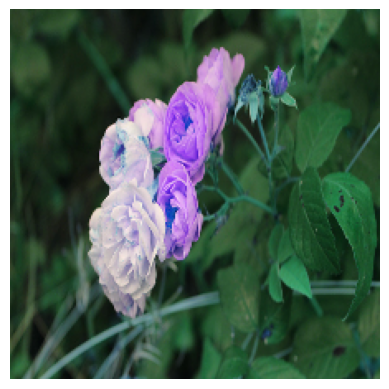

In [20]:
plt.axis('off')
plt.imshow(X[2])

In [21]:
image_labels[722]

'pillow'

In [12]:
# Get the model with the last layer (top layer)
feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"
pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False
)

In [ ]:
model = tf_keras.Sequential([
    pretrained_model_without_top_layer,
    tf_keras.layers.Dense(5)
])

model.compile(optimizer='adam',
              loss=tf_keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

model.fit(X_train_scaled, y_train, epochs=5)

In [ ]:
model.evaluate(X_test, y_test)